# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 9

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error

import warnings
warnings.filterwarnings("ignore")



## Задача 1


### 1. Загрузка данных и предобработка
#### **Профиль биология**

Загрузите [данные](https://www.kaggle.com/datasets/marshuu/breast-cancer) по предсказанию рака груди.

   

In [54]:
data = pd.read_csv('breast_cancer.csv')
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


Проверьте, имеются ли в ваших данных пропуски. Если да, то удалите их.


In [4]:
data.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

Библиотека `pandas` позволяет строить графики `matplotlib` для своих объектов `DataFrame` ([подробнее](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)). Посмотрим, как распределены значения признака `Bare Nuclei` для разных классов:

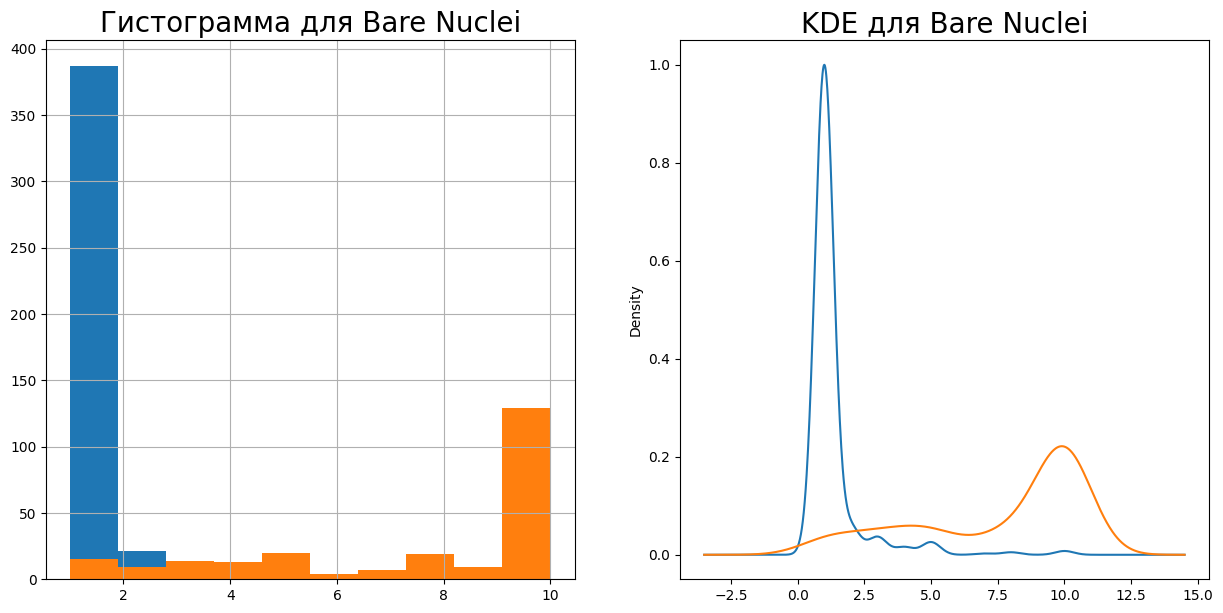

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
data.groupby("Class")['Bare Nuclei'].hist(ax=axs[0], )
data.groupby("Class")['Bare Nuclei'].plot(kind='kde', ax=axs[1])
axs[0].set_title('Гистограмма для Bare Nuclei', fontsize=20)
axs[1].set_title('KDE для Bare Nuclei', fontsize=20);

Постройте гистограммы и ядерные оценки плотности для всех признаков из датасета отдельно для каждого класса.


In [17]:
data.columns, data.shape

(Index(['Clump Thickness', 'Uniformity of Cell Size',
        'Uniformity of Cell Shape', 'Marginal Adhesion',
        'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
        'Normal Nucleoli', 'Mitoses', 'Class'],
       dtype='object'),
 (683, 10))

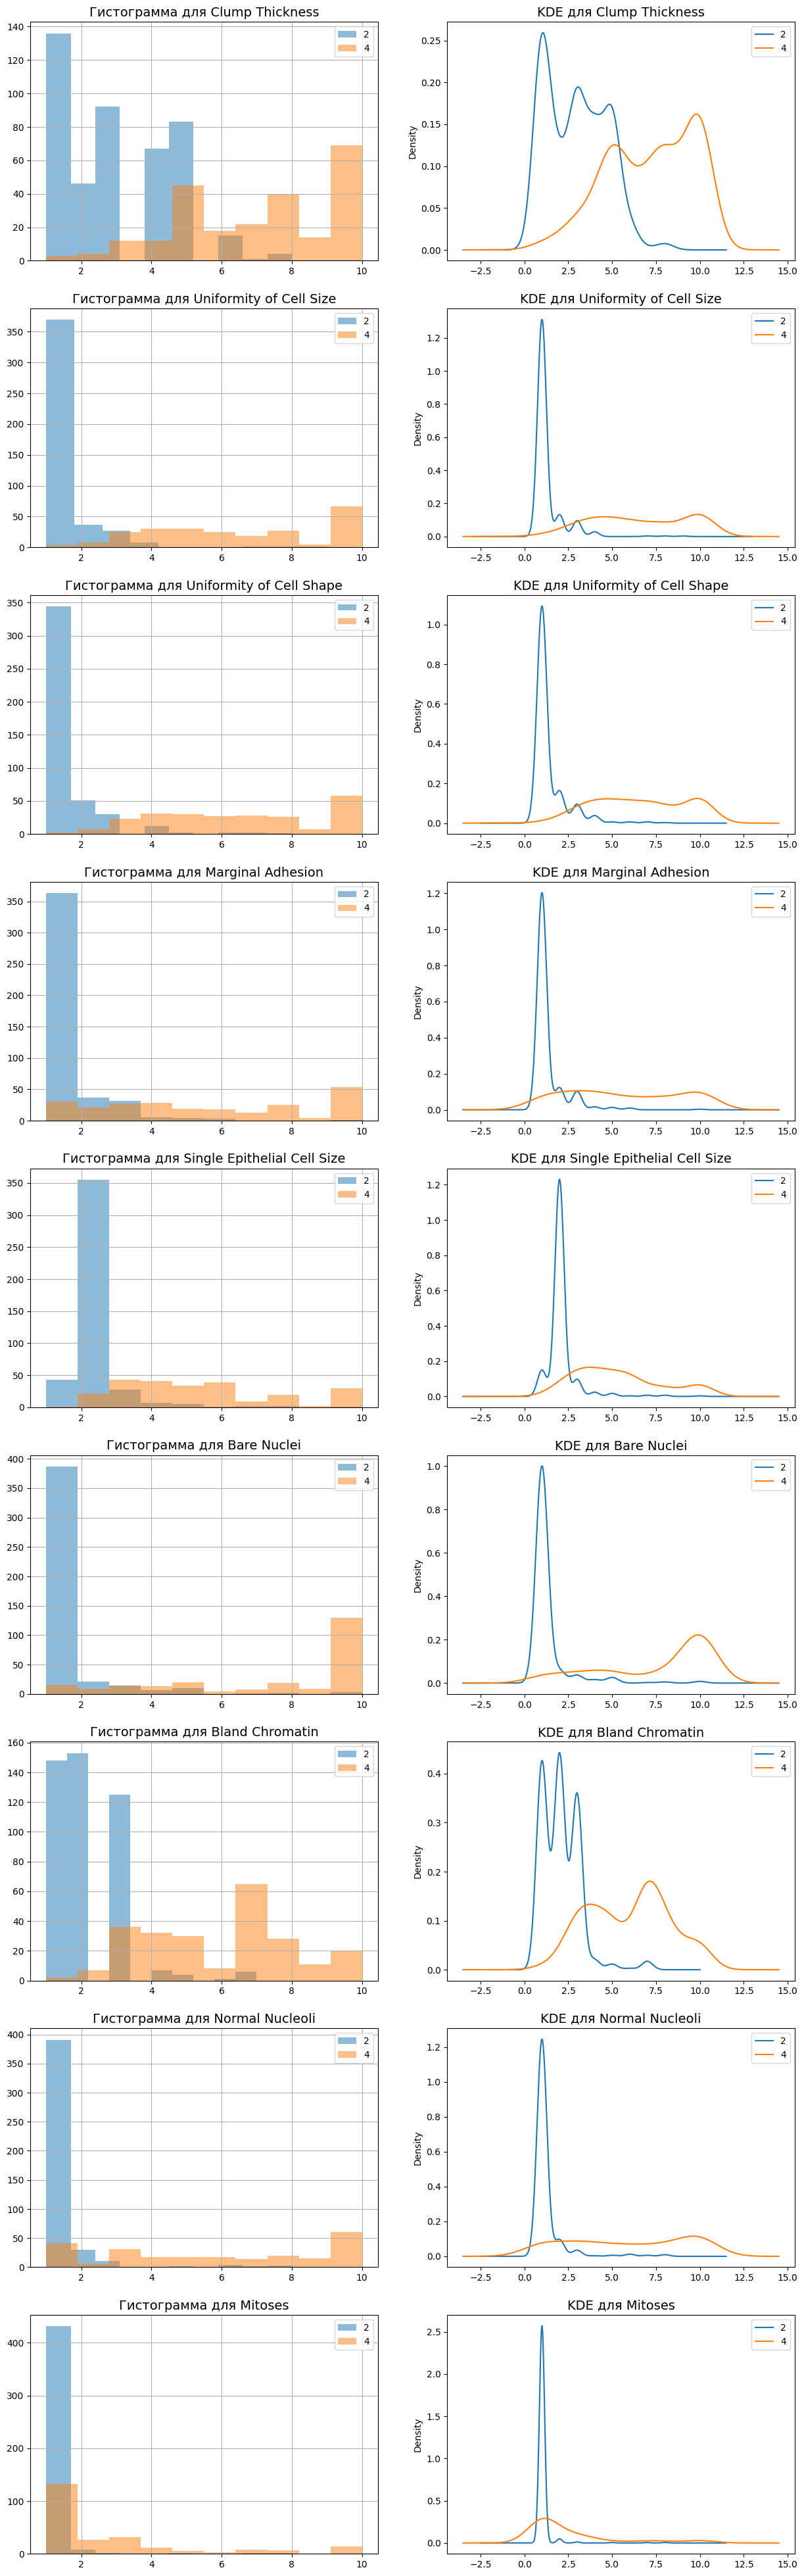

In [34]:
grouped_data = data.groupby('Class')
fig, axs = plt.subplots(9, 2, figsize=(15, 50))
for i, name in enumerate(data.columns[:-1]):
  grouped_data[name].hist(ax=axs[i][0], alpha=0.5 )
  grouped_data[name].plot(kind='kde', ax=axs[i][1])
  axs[i][0].set_title(f'Гистограмма для {name}' , fontsize=14)
  axs[i][1].set_title(f'KDE для {name}', fontsize=14)
  axs[i][0].legend(['2', '4'])
  axs[i][1].legend(['2', '4']); 


Какие выводы вы можете сделать из полученный графиков?

**Вывод:** 
Из полученных графиков можно сделать следующие выводы:



*  Признаки "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Bare Nuclei", "Bland Chromatin", и "Normal Nucleoli" имеют более смещенное распределение у опухолей злокачественной природы (метка 4) по сравнению с доброкачественными опухолями (метка 2).
*   Признак "Single Epithelial Cell Size" также имеет более смещенное распределение у злокачественных опухолей, но этот признак менее различает между классами, чем другие признаки.
*   Гистограммы и ядерные оценки плотности распределения для признака "Mitoses" имеют схожее распределение для обоих классов, что говорит о том, что этот признак не является хорошим разделителем между опухолями доброкачественной и злокачественной природы.

Поэтому можно сделать вывод, что некоторые признаки из датасета могут быть полезны для предсказания типа опухоли.

### 2. Обучение модели

Продолжайте использовать выбранные вами данные.

Создайте массив признаков и массив таргета. Разбейте ваши данные на обучающую и тестовую выборки в отношении 7:3.

In [55]:
needed_columns = ['Clump Thickness', 'Uniformity of Cell Size',
        'Uniformity of Cell Shape', 'Marginal Adhesion',
        'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
        'Normal Nucleoli', 'Mitoses']

X = data[needed_columns]
y = data['Class']
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3)

Отмасштабируйте свои признаки.

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

Обучите модель логистической регрессии.

In [57]:
lg = LogisticRegression()
lg.fit(X_train_std, y_train)

LogisticRegression()

Сделайте предсказание для тестовой выборки и оцените качества полученного предсказания.

In [58]:
y_pred = lg.predict(X_test_std)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9658536585365853

**Вывод:** Модель  логистической регрессии показала высокую точность предсказания на тестовой выборке-0.966. Значит модель способна хорошо обобщать и классифицировать данные



## Задача 2

В этой задаче вам предстоит реализовать стохастический градиентный спуск, используйте данные из первого задания.

Выберите некоторое начальное приближение оценок коэффициентов, например, в начале координат.

In [59]:
theta_0 = np.zeros(X_train.shape[1])

Реализуйте процедуру стохастического градиентного спуска для поиска оценок коэффициентов в модели логистической регрессии. Размер батча (набор объектов на каждой итерации) обычно берут кратно степени двойки, например, 128 или 256.

In [67]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def logistic_regression_sgd(X_train, y_train, theta_0, sigmoid, eta, iter_count=150, batch_size=256):
  
  y_train = np.array(y_train)
  c = X_train.shape[0]
  theta = theta_0
  history = [theta_0]
  X_train = np.array(X_train)

  for i in range(iter_count):
    ind = np.random.choice(c, batch_size, replace=False)
    batch_X, batch_y = X_train[ind], y_train[ind]
    grad = (batch_y - sigmoid(np.sum((theta * batch_X), axis=1)))* batch_X.T
    theta = theta + eta * np.sum(grad, axis=1)
    history.append(theta)
  return history



Нарисуйте графики зависимости значений метрики accuracy от номера итерации для обучающей и валидационной выборок. Сколько итераций пришлось совершить?

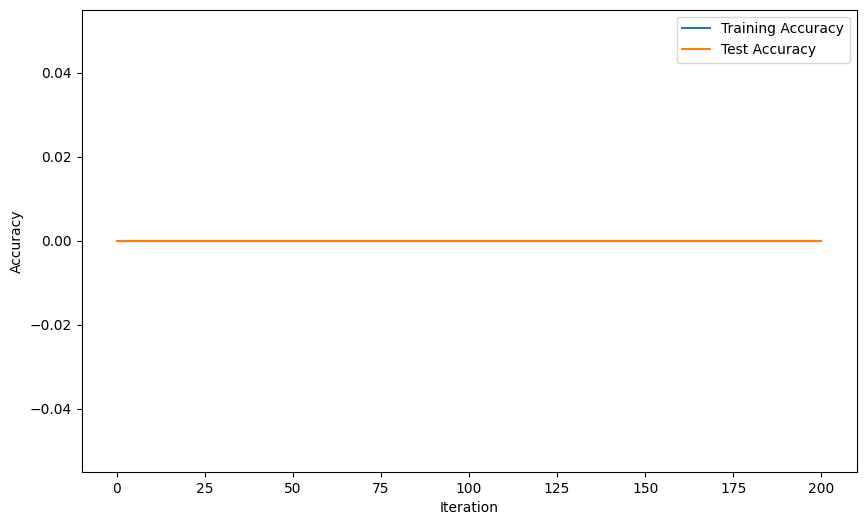

In [80]:
eta = 0.3
iter_count =200
batch_size = 256

theta_history = logistic_regression_sgd(X_train, y_train, theta_0, sigmoid, eta, iter_count, batch_size)


def predict(X, theta_history):
    return np.round(sigmoid(np.dot(X, theta_history.T)))


accuracies_train = [accuracy_score(y_train, predict(X_train, theta_history[i])) for i in range(len(theta_history))]
accuracies_test = [accuracy_score(y_test, predict(X_test, theta_history[i])) for i in range(len(theta_history))]


plt.figure(figsize=(10, 6))
plt.plot(range(iter_count+1), accuracies_train, label='Training Accuracy')
plt.plot(range(iter_count+1), accuracies_test, label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Посчитайте ошибку на тестовой выборке.

In [77]:
print("Test accuracy:", accuracy_score(y_test, predict(X_test, theta_history[-1])))
print("Training accuracy:", accuracy_score(y_train, predict(X_train, theta_history[-1])))


Test accuracy: 0.0
Training accuracy: 0.0


Сделайте выводы.
Очевидно, что в коде есть ошибка, так как показатели 0.